In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
tickers = ["AAPL", "GOOGL", "AMZN", "TSLA", "META","MSFT"]

data_list = []
for ticker in tickers:
    df = yf.download(ticker, start="2010-01-01", end="2025-03-03")[["Close"]]
    df.columns = [ticker]  
    data_list.append(df)

df_all = pd.concat(data_list, axis=1).dropna()
print(df_all.columns)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Index(['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'META', 'MSFT'], dtype='object')


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_all)

def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 120
X, y = create_sequences(scaled_data, time_steps)

In [5]:
split = int(len(X) * 0.85)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(y_train.shape[1])  
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=50, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


c:\Users\Lakshin Khurana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0287 - val_loss: 0.0204
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0033 - val_loss: 0.0143
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0025 - val_loss: 0.0145
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0019 - val_loss: 0.0119
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0016 - val_loss: 0.0100
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0016 - val_loss: 0.0068
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0012 - val_loss: 0.0047
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0011 - val_loss: 0.0043
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0011 - val_loss: 0.0034
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.5100e-04 - val_loss: 0.0030
Epoch 12/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 9.4595e-04

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [8]:
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, test_predictions)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 772.32
Root Mean Squared Error (RMSE): 27.79
Mean Absolute Error (MAE): 17.87
R² Score: 0.85


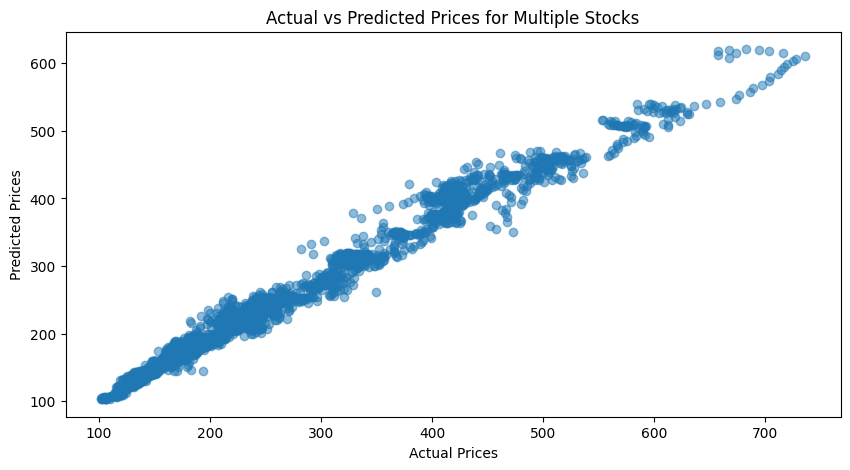

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_actual.flatten(), test_predictions.flatten(), alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices for Multiple Stocks")
plt.show()

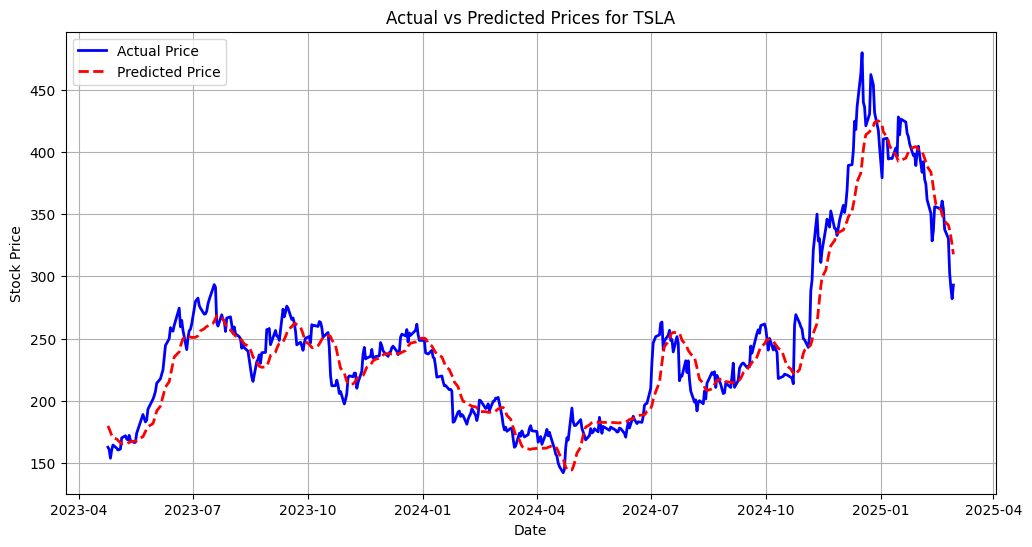

In [ ]:

stock_index = 3  

actual_prices = y_test_actual[:, stock_index]
predicted_prices = test_predictions[:, stock_index]

dates = df_all.index[-len(y_test_actual):]  

plt.figure(figsize=(12, 6))
plt.plot(dates, actual_prices, label="Actual Price", color='blue', linewidth=2)
plt.plot(dates, predicted_prices, label="Predicted Price", color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Actual vs Predicted Prices for {tickers[stock_index]}")
plt.legend()
plt.grid()
plt.show()

In [12]:
# def predict_future_prices(model, df, scaler, days=180, time_steps=60):
#     num_features_expected = scaler.scale_.shape[0]
#     if df.shape[1] != num_features_expected:
#         raise ValueError(f"DataFrame has {df.shape[1]} features but scaler expects {num_features_expected}. "
#                          "Please pass the same feature set used during training.")

#     # Get last time_steps rows
#     last_sequence = df.iloc[-time_steps:].values  # shape: (time_steps, num_features)
#     current_sequence = scaler.transform(last_sequence)  # shape: (time_steps, num_features)

#     future_predictions = []
#     close_index = num_features_expected - 1  # assume Close is the last column

#     # Get scaler parameters for the Close column:
#     close_min = scaler.min_[close_index]
#     close_scale = scaler.scale_[close_index]

#     for _ in range(days):
#         # Reshape input to (1, time_steps, num_features)
#         X_input = current_sequence.reshape(1, time_steps, num_features_expected)
#         # Predict the next day's Close price (scaled)
#         predicted_scaled = model.predict(X_input)[0, 0]
#         # Create a new row: copy last row and update the Close column with the prediction
#         new_row = current_sequence[-1].copy()
#         new_row[close_index] = predicted_scaled
#         # Convert predicted scaled Close value back to original scale:
#         predicted_original = predicted_scaled / close_scale + close_min
#         future_predictions.append(predicted_original)
#         # Update the sequence by dropping the oldest row and appending the new row
#         current_sequence = np.vstack([current_sequence[1:], new_row])

#     # Generate future dates
#     future_dates = pd.date_range(start=df.index[-1], periods=days+1, freq='B')[1:]
#     future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': future_predictions})
#     future_df.set_index('Date', inplace=True)
#     future_df
#     return future_df

# def plot_future_predictions(df, future_df, stock_ticker):
#     """
#     Plots recent actual Close prices and future predicted Close prices.

#     Parameters:
#       - df: Original DataFrame with actual data. Must include a 'Close' column.
#             In the multivariate case, 'Close' is assumed to be the last column.
#       - future_df: DataFrame returned from predict_future_prices().
#       - stock_ticker: Ticker string used for the plot title.
#     """
#     plt.figure(figsize=(12, 5))

#     # For actual prices, if multivariate, assume 'Close' column is named 'Close'
#     if df.shape[1] > 1 and 'Close' in df.columns:
#         actual = df['Close']
#     else:
#         # Otherwise, use the single column (assumed to be Close)
#         actual = df.iloc[:, 0]

#     # Plot the last 100 days of actual Close prices
#     plt.plot(df.index[-100:], actual.iloc[-100:], label="Actual Price", color="blue")
#     # Plot the future predicted prices
#     plt.plot(future_df.index, future_df["Predicted Price"], linestyle="dashed", color="red", label="Predicted Price")
#     plt.xlabel("Date")
#     plt.ylabel("Stock Price (USD)")
#     plt.title(f"Predicted Stock Prices for {stock_ticker} (Next 6 Months)")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # ----- Example Usage -----
# # 'df' should be your original DataFrame with all features.
# # For example, if you're using a multivariate dataset with columns like [Open, High, Low, Volume, ... , Close]:
# # Make sure df.index is datetime and df has 6 features (with 'Close' as the last column).
# # 'scaler' is the MinMaxScaler fitted on df.
# #
# # Example:
# future_prices = predict_future_prices(model, df_all, scaler, 50, 200)
# plot_future_predictions(df_all, future_prices, "AAPL")
# print(future_prices)


In [14]:
model.save("LSTM_model.keras")